In [1]:
import pandas as pd
import math, statistics
import glob
import csv, re

path_mix_spa = r"C:/Users/erick/OneDrive/Desktop/MT-FBK-internship/on-off/mixed_spa/heroes*.csv"
path_mix_eng = r"C:/Users/erick/OneDrive/Desktop/MT-FBK-internship/on-off/mixed_eng/heroes*.csv"
path_on_spa = r"C:/Users/erick/OneDrive/Desktop/MT-FBK-internship/on-off/on_spa/heroes*.csv"
path_on_eng = r"C:/Users/erick/OneDrive/Desktop/MT-FBK-internship/on-off/on_eng/heroes*.csv"
path_off_spa = r"C:/Users/erick/OneDrive/Desktop/MT-FBK-internship/on-off/off_spa/heroes*.csv"
path_off_eng = r"C:/Users/erick/OneDrive/Desktop/MT-FBK-internship/on-off/off_eng/heroes*.csv"

# function to obtain length of prosodic phrases for each segment

def phr_length(path, tag='x'): # tag = on/off/mixed
    final_value_list = []
    final_plength_list = []
    for fname in glob.glob(path):
        df = pd.read_csv(fname, delimiter='|')

        # phr_dur = duration for each prosodic phrase
        #          It is a list of lists (prosodic phrases) of tuples (words).
        phr_dur = []
        temp_l_ = []
        w_count = 0
        
        # phrases are delimited by silences longer than 0.25 secs or periods.
        for index, row in df.iterrows():
            w_count += 1
            if w_count == len(df):
                temp_l_.append(row.duration)
                phr_dur.append(sum(temp_l_))
                temp_l_ = []      
            elif(float(row.pause_after)) >= 0.25:
                temp_l_.append(row.duration)
                phr_dur.append(sum(temp_l_))
                temp_l_ = []
            else:
                temp_l_.append((row.duration))
        final_plength_list.append(phr_dur)

    n = 0 # to assign the prosodic phrase number to each row in the df
    for l in final_plength_list:
        for i in l:
            n = n+1
            try:
                name = ''.join(re.findall(r'(s\d.+\d)', fname))
                name = name+'.'+str(n)
                phr_duration = i

                vl = [name, phr_duration, str(tag)]
            # to handle phrases with 0 duration (if any)
            except:
                name = ''.join(re.findall('(s\d.+\d)', fname))
                name = name+'.'+str(n)

                vl = [name, 0, str(tag)]
        
        final_value_list.append(vl)
        
    return final_value_list

mix_spa = phr_length(path_mix_spa, 'mix')
mix_eng = phr_length(path_mix_eng, 'mix')
on_spa = phr_length(path_on_spa, 'on')
on_eng = phr_length(path_on_eng, 'on')
off_spa = phr_length(path_off_spa, 'off')
off_eng = phr_length(path_off_eng, 'off')


In [2]:
mix_spa

[['s3_9_spa_aligned_spa0307.2', 1.23, 'mix'],
 ['s3_9_spa_aligned_spa0307.4', 1.14, 'mix'],
 ['s3_9_spa_aligned_spa0307.6', 1.18, 'mix'],
 ['s3_9_spa_aligned_spa0307.8', 1.23, 'mix'],
 ['s3_9_spa_aligned_spa0307.10', 0.8500000000000001, 'mix'],
 ['s3_9_spa_aligned_spa0307.12', 2.2800000000000002, 'mix'],
 ['s3_9_spa_aligned_spa0307.14', 2.79, 'mix'],
 ['s3_9_spa_aligned_spa0307.16', 2.08, 'mix'],
 ['s3_9_spa_aligned_spa0307.19', 1.7799999999999998, 'mix'],
 ['s3_9_spa_aligned_spa0307.20', 2.5300000000000002, 'mix'],
 ['s3_9_spa_aligned_spa0307.22', 1.62, 'mix'],
 ['s3_9_spa_aligned_spa0307.23', 2.96, 'mix'],
 ['s3_9_spa_aligned_spa0307.25', 2.96, 'mix'],
 ['s3_9_spa_aligned_spa0307.26', 2.5799999999999996, 'mix'],
 ['s3_9_spa_aligned_spa0307.27', 1.73, 'mix'],
 ['s3_9_spa_aligned_spa0307.29', 2.5700000000000003, 'mix'],
 ['s3_9_spa_aligned_spa0307.30', 2.01, 'mix'],
 ['s3_9_spa_aligned_spa0307.31', 3.85, 'mix'],
 ['s3_9_spa_aligned_spa0307.33', 0.59, 'mix'],
 ['s3_9_spa_aligned_spa0307

In [3]:
with open('phrase_duration_mix_spa.csv', "w", newline='',encoding='utf-8') as f:
        csv_out=csv.writer(f)
        csv_out.writerow(['file_name','start_time', 'end_time', 'duration', 'on/off'])
        for row in mix_spa:
            csv_out.writerow(row)

In [4]:
# create a dataframe for each screen category

mix_df = pd.DataFrame({'phrase_id': [i[0][-6:] for i in mix_eng], 'spa_id':[i[0][-6:] for i in mix_spa],
                       'eng_duration': [i[1] for i in mix_eng],
                      'spa_duration': [i[1] for i in mix_spa]})

on_df = pd.DataFrame({'phrase_id': [i[0][-6:] for i in on_eng], 'spa_id':[i[0][-6:] for i in on_spa],
                      'eng_duration': [i[1] for i in on_eng],
                      'spa_duration': [i[1] for i in on_spa]})

off_df = pd.DataFrame({'phrase_id': [i[0][-6:] for i in off_eng], 'spa_id':[i[0][-6:] for i in off_spa],
                       'eng_duration': [i[1] for i in off_eng],
                      'spa_duration': [i[1] for i in off_spa]})

dfs = [mix_df, on_df, off_df]

for df in dfs:
    df['duration_diff_pct'] = (df['spa_duration'] / df['eng_duration']) - 1

In [5]:
#sample df

on_df

,phrase_id,spa_id,eng_duration,spa_duration,duration_diff_pct
0,0318.1,0318.1,1.38,1.81,0.311594
1,0318.2,0318.2,2.37,2.56,0.080169
2,0318.3,0318.3,1.08,1.07,-0.009259
3,0318.4,0318.4,1.43,0.90,-0.370629
4,0318.5,0318.5,1.39,1.35,-0.028777
...,...,...,...,...,...
4157,8.5447,8.5577,1.93,1.82,-0.056995
4158,8.5450,8.5579,0.50,0.43,-0.140000
4159,8.5451,8.5580,1.97,1.56,-0.208122
4160,8.5452,8.5582,1.19,1.15,-0.033613


## **************** Results here ****************

In [6]:
# ON

print('mean phrase duration ENG (secs): ', on_df['eng_duration'].mean())
print('stdev phrase duration ENG (secs): ', on_df['eng_duration'].std())

print('mean phrase duration SPA (secs): ', on_df['spa_duration'].mean())
print('stdev phrase duration SPA (secs): ', on_df['spa_duration'].std())

print('mean proportional difference in phrase length (secs): ', on_df['duration_diff_pct'].mean())

on_df['duration_diff_pct'].plot.hist()

mean phrase duration ENG (secs):  1.3961244593945226
stdev phrase duration ENG (secs):  0.8402507018123755
mean phrase duration SPA (secs):  1.3273666506487276
stdev phrase duration SPA (secs):  0.7774998195216476
mean proportional difference in phrase length (secs):  0.10562654925539713


mean phrase duration ENG (secs):  1.4840166666666676
stdev phrase duration ENG (secs):  0.9863085403849303
mean phrase duration SPA (secs):  1.3653749999999996
stdev phrase duration SPA (secs):  0.8596373303074073
mean proportional difference in phrase length (secs):  0.06760986939029953


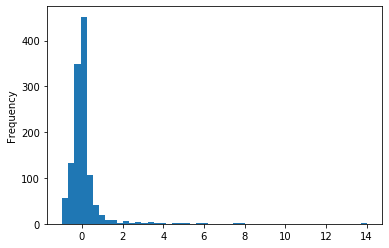

In [7]:
# OFF

print('mean phrase duration ENG (secs): ', off_df['eng_duration'].mean())
print('stdev phrase duration ENG (secs): ', off_df['eng_duration'].std())

print('mean phrase duration SPA (secs): ', off_df['spa_duration'].mean())
print('stdev phrase duration SPA (secs): ', off_df['spa_duration'].std())

print('mean proportional difference in phrase length (secs): ', off_df['duration_diff_pct'].mean())

off_df['duration_diff_pct'].plot.hist(bins=50)

mean phrase duration ENG (secs):  1.9285139318885416
stdev phrase duration ENG (secs):  1.1019058159208441
mean phrase duration SPA (secs):  1.7714922600619172
stdev phrase duration SPA (secs):  1.0487512204816463


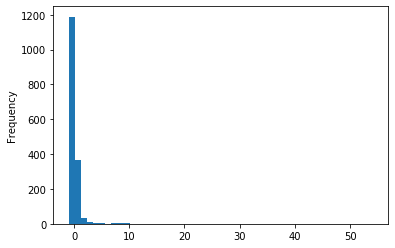

In [8]:
# MIXED

print('mean phrase duration ENG (secs): ', mix_df['eng_duration'].mean())
print('stdev phrase duration ENG (secs): ', mix_df['eng_duration'].std())

print('mean phrase duration SPA (secs): ', mix_df['spa_duration'].mean())
print('stdev phrase duration SPA (secs): ', mix_df['spa_duration'].std())

mix_df['duration_diff_pct'].plot.hist(bins=50)